Random forests are robust to overfitting, can handle thousands of input variables without variable decision, and run efficiently on large datasets. A random forest seems like it could work well as our predictor for san francisco crime data. 

In [1]:
#imports 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from path import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

In [2]:
#load data
file_path = Path("../Resources/ml_df.csv")
df = pd.read_csv(file_path)
df.head()

,ZipCode,PdDistricts,Months,Day,TimeOfDay,Resolutions,Category_ASSAULT,Category_BURGLARY,Category_DRUG/NARCOTIC,Category_FRAUD,...,Descript_POSSESSION OF NARCOTICS PARAPHERNALIA,Descript_RESISTING ARREST,Descript_STOLEN AUTOMOBILE,Descript_STOLEN TRUCK,Descript_SUSPICIOUS OCCURRENCE,Descript_THREATS AGAINST LIFE,Descript_TRAFFIC VIOLATION,Descript_TRAFFIC VIOLATION ARREST,Descript_TRESPASSING,Descript_WARRANT ARREST
0,-0.860927,0.950634,-0.443307,-1.465466,0.720326,0,-0.315846,-0.202024,-0.171087,-0.134147,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
1,-0.860927,0.950634,-0.443307,-1.465466,0.720326,0,-0.315846,-0.202024,-0.171087,-0.134147,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
2,0.909206,-1.566836,-1.598508,-0.970159,-1.132944,0,-0.315846,-0.202024,-0.171087,-0.134147,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,6.883863
3,-0.439467,1.669911,-0.443307,1.011070,-0.206309,1,-0.315846,-0.202024,-0.171087,-0.134147,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
4,-0.945219,-0.487921,-0.443307,-1.465466,1.646961,1,-0.315846,-0.202024,-0.171087,-0.134147,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267


In [3]:
#create features
X = df.drop("Resolutions", axis=1)

#create target
y = df["Resolutions"]

In [11]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# train the classifier
brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

In [13]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_test,y_pred)
print(f"balanced accuracy score = {balanced_acc_score*100:.2f}%")

balanced accuracy score = 83.79%


In [14]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Acutal 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_df)

,Predicted 0,Predicted 1
Acutal 0,8301,1500
Actual 1,4622,22376


In [15]:
# Print the imbalanced classification report
print("imbalanced classification report")
print(classification_report_imbalanced(y_test,y_pred))

imbalanced classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.64      0.85      0.83      0.73      0.84      0.70      9801
          1       0.94      0.83      0.85      0.88      0.84      0.70     26998

avg / total       0.86      0.83      0.84      0.84      0.84      0.70     36799



In [16]:
# List the features sorted in descending order by feature importance
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
features = X.columns
importances = brf.feature_importances_
indices = np.argsort(importances)[::-1]

#print feature rankings
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f+1, features[f], importances[indices[f]]))

Feature ranking:
1. ZipCode (0.135830)
2. PdDistricts (0.097496)
3. Months (0.089872)
4. Day (0.073774)
5. TimeOfDay (0.067347)
6. Category_ASSAULT (0.057167)
7. Category_BURGLARY (0.045664)
8. Category_DRUG/NARCOTIC (0.037846)
9. Category_FRAUD (0.033283)
10. Category_LARCENY/THEFT (0.032217)
11. Category_MISSING PERSON (0.030601)
12. Category_NON-CRIMINAL (0.024978)
13. Category_OTHER (0.020968)
14. Category_OTHER OFFENSES (0.017806)
15. Category_ROBBERY (0.016859)
16. Category_SECONDARY CODES (0.016572)
17. Category_SUSPICIOUS OCC (0.012801)
18. Category_TRESPASS (0.010513)
19. Category_VANDALISM (0.010362)
20. Category_VEHICLE THEFT (0.009596)
21. Category_WARRANTS (0.009372)
22. Category_WEAPON LAWS (0.008978)
23. Descript_AGGRAVATED ASSAULT WITH A DEADLY WEAPON (0.008877)
24. Descript_AIDED CASE (0.008793)
25. Descript_AIDED CASE, MENTAL DISTURBED (0.008767)
26. Descript_BATTERY (0.008231)
27. Descript_BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP (0.007856)
28. Descript_CREDIT C

this feature ranking is based on tree entropy 

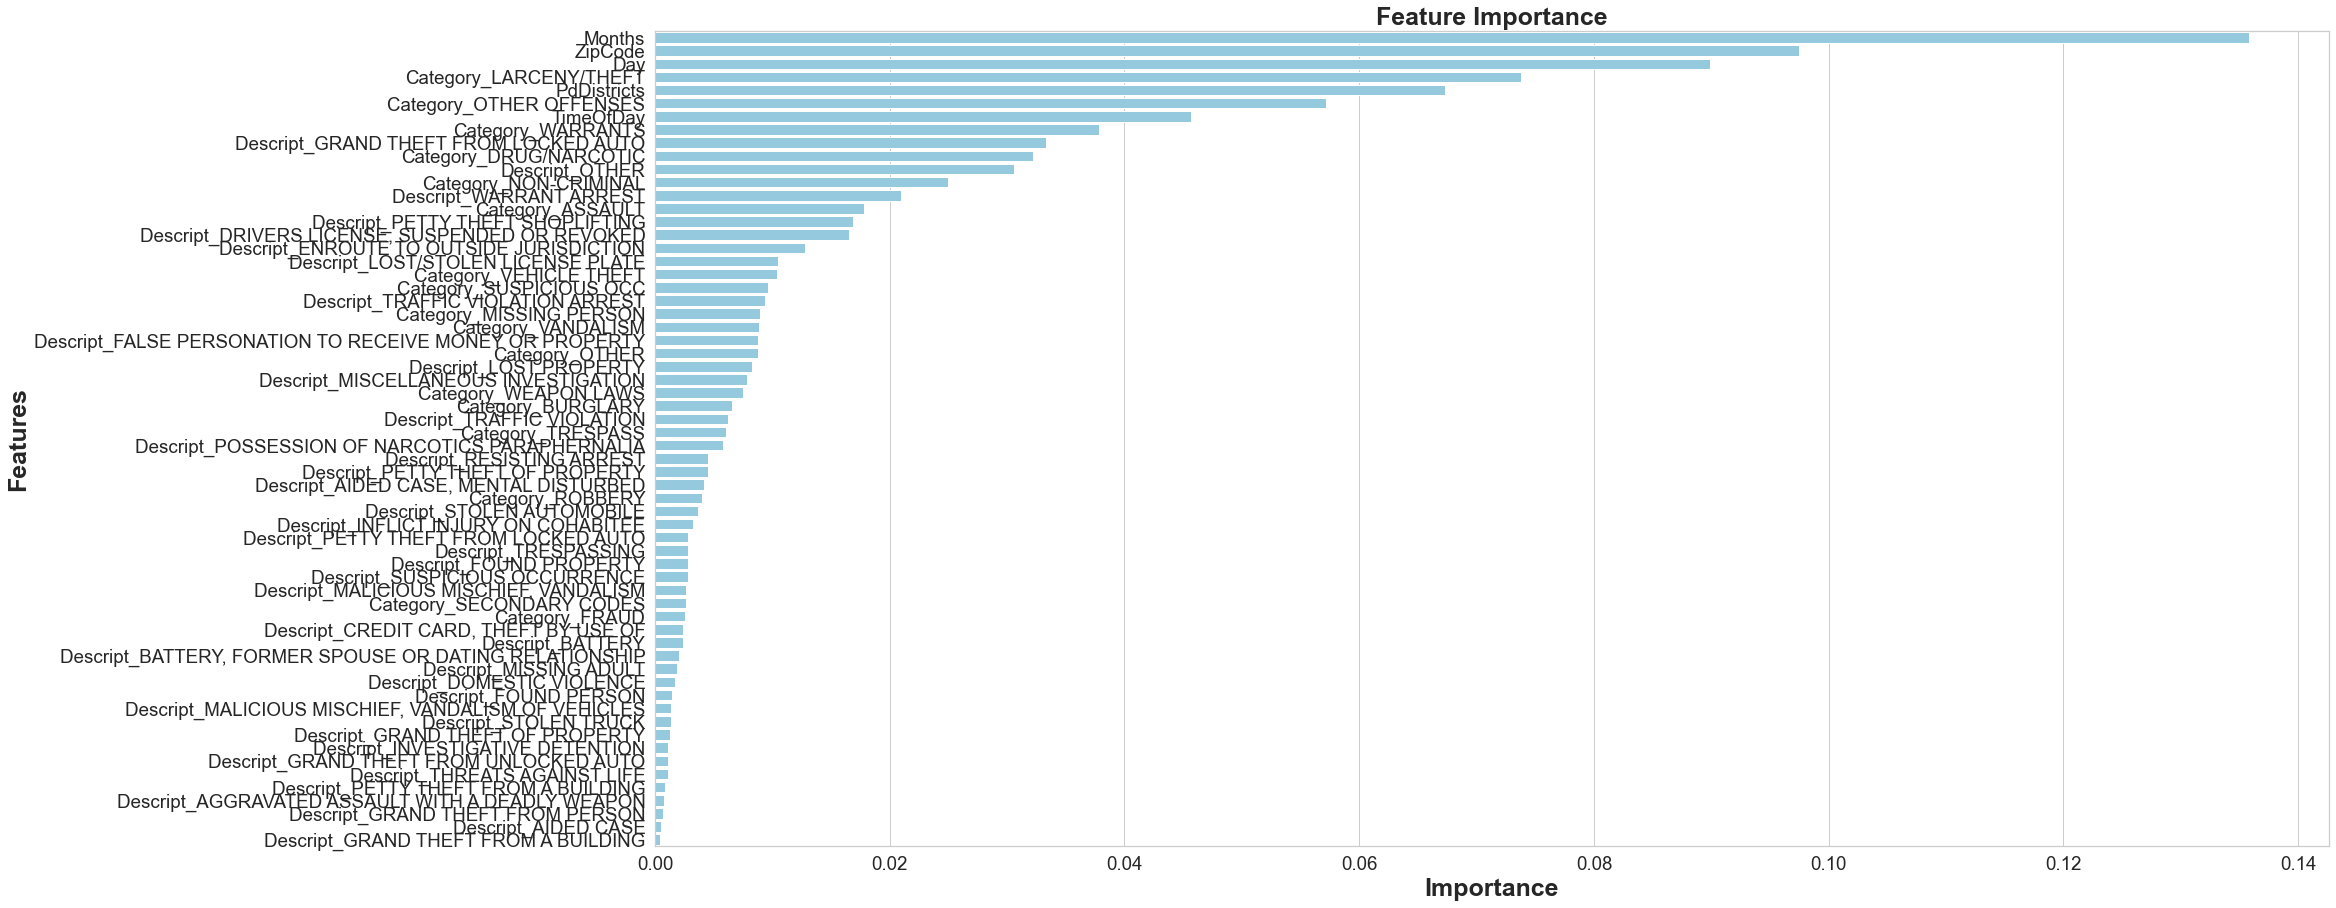

None

,Features,Gini-Importance
0,Months,0.135830
1,ZipCode,0.097496
2,Day,0.089872
3,Category_LARCENY/THEFT,0.073774
4,PdDistricts,0.067347
...,...,...
57,Descript_PETTY THEFT FROM A BUILDING,0.000889
58,Descript_AGGRAVATED ASSAULT WITH A DEADLY WEAPON,0.000758
59,Descript_GRAND THEFT FROM PERSON,0.000692
60,Descript_AIDED CASE,0.000506


In [17]:
#https://towardsdatascience.com/machine-learning-step-by-step-6fbde95c455a
feats = {}
for feature, importance in zip(X.columns, brf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.savefig("/Users/bkirton/Desktop/sanFranCrimePredictor/images/GINI_graph.png")
display(plt.show())
display(importances)


This is our baseline random forest model. It uses all of the predicting features and default settings defined in the scikit-learn random forest classifier documentation. We can see what features are most important to the model to predict whether or not a crime will result in an arrest. 

In [ ]:
#import our pca_df to train another baseline model to see if any improvements are made on predictions
file_path = Path("../Resources/pca_df.csv")
pca_df = pd.read_csv(file_path)
pca_df.head()


In [ ]:
#create features
X = pca_df.drop("Target", axis=1)

#create target
y = pca_df["Target"]

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.5)

In [ ]:
# train the classifier
brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

In [ ]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_test,y_pred)
print(f"balanced accuracy score = {balanced_acc_score*100:.2f}%")

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Acutal 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_df)

In [ ]:
# Print the imbalanced classification report
print("imbalanced classification report")
print(classification_report_imbalanced(y_test,y_pred))

In [ ]:
features = X.columns
importances = brf.feature_importances_
indices = np.argsort(importances)[::-1]

#print feature rankings
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f+1, features[f], importances[indices[f]]))

In [ ]:
#test the model with the validation set 
brf.fit(X_train2, y_train2)
y_pred_val = brf.predict(X_val)

In [ ]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_val,y_pred_val)
print(f"balanced accuracy score = {balanced_acc_score*100:.2f}%")

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_val, y_pred_val)
cm_df = pd.DataFrame(cm, index=["Acutal 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_df)

In [ ]:
# Print the imbalanced classification report
print("imbalanced classification report")
print(classification_report_imbalanced(y_val,y_pred_val))